# Exercise- K-Nearest Neighbor

In [1]:
# 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [2]:
# Quiet my warnings for the sake of the lesson:
import warnings
warnings.filterwarnings("ignore")

# Tabular data friends:
import pandas as pd
import numpy as np

# Data viz:
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn stuff:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Data acquisition
from pydataset import data
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
import env
import os
import sklearn
import acquire
import prepare

In [3]:
df= acquire.get_titanic_data()

In [4]:
df = prepare.prep_titanic(df)

In [5]:
df=df.drop(columns=['Unnamed: 0','passenger_id','embark_town','sex'])

In [6]:
train, validate, test =prepare.split_data(df,'survived')

train -> (534, 9), 59.93%
validate -> (178, 9),19.98%
test -> (179, 9), 20.09%


In [8]:
X_train = train.iloc[:,1:]
y_train = train.survived

X_validate = validate.iloc[:,1:]
y_validate = validate.survived

X_test = test.iloc[:,1:]
y_test = test.survived

In [10]:
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,3,0,0,7.8958,1,1,0,0
380,1,0,0,227.5250,1,0,0,0
492,1,0,0,30.5000,1,1,0,1
55,1,0,0,35.5000,1,1,0,1
243,3,0,0,7.1250,1,1,0,1


In [12]:
# weights = ['uniform', 'distance']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')


In [13]:
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [14]:
KNeighborsClassifier()


KNeighborsClassifier()

In [21]:
y_pred = knn.predict(X_train)
y_pred[:5]

array([0, 1, 1, 0, 0])

In [23]:
y_pred_proba = knn.predict_proba(X_train)
y_pred_proba

array([[0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6],
       ...,
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8]])

In [24]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))


Accuracy of KNN classifier on training set: 0.81


## 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [26]:
print(confusion_matrix(y_train, y_pred))

[[280  49]
 [ 50 155]]


In [28]:
pd.crosstab(y_train, y_pred)

col_0,0,1
survived,,
0,280,49
1,50,155


In [27]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.85      0.85       329
           1       0.76      0.76      0.76       205

    accuracy                           0.81       534
   macro avg       0.80      0.80      0.80       534
weighted avg       0.81      0.81      0.81       534



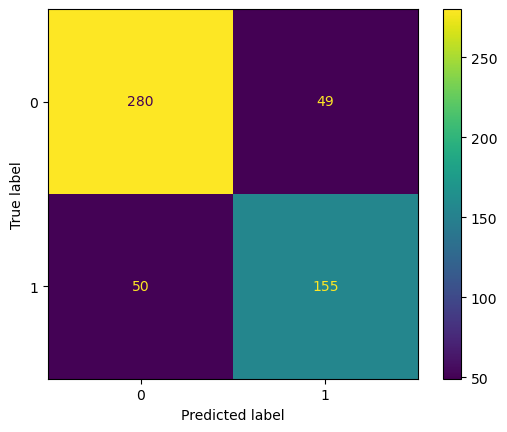

In [31]:
plot_confusion_matrix(knn, X_train, y_train)
plt.show()

## 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [33]:
conf=confusion_matrix(y_train, y_pred)

In [34]:
TN, FP, FN, TP = conf.ravel()

In [35]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN

In [36]:
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.8146067415730337

True Positive Rate/Sensitivity/Recall/Power: 0.7560975609756098
False Positive Rate/False Alarm Ratio/Fall-out: 0.14893617021276595
True Negative Rate/Specificity/Selectivity: 0.851063829787234
False Negative Rate/Miss Rate: 0.24390243902439024

Precision/PPV: 0.7598039215686274
F1 Score: 0.7579462102689486

Support (0): 205
Support (1): 329


## 4. Run through steps 1-3 setting k to 10



In [39]:
df= acquire.get_titanic_data()

In [40]:
df = prepare.prep_titanic(df)

In [41]:
df=df.drop(columns=['Unnamed: 0','passenger_id','embark_town','sex'])

In [42]:
train, validate, test =prepare.split_data(df,'survived')

train -> (534, 9), 59.93%
validate -> (178, 9),19.98%
test -> (179, 9), 20.09%


In [43]:
X_train10 = train.iloc[:,1:]
y_train10 = train.survived

X_validate10 = validate.iloc[:,1:]
y_validate10 = validate.survived

X_test10 = test.iloc[:,1:]
y_test10 = test.survived

In [44]:
X_train10.head()

,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,3,0,0,7.8958,1,1,0,0
380,1,0,0,227.5250,1,0,0,0
492,1,0,0,30.5000,1,1,0,1
55,1,0,0,35.5000,1,1,0,1
243,3,0,0,7.1250,1,1,0,1


In [49]:
# weights = ['uniform', 'distance']
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')


In [50]:
knn.fit(X_train10, y_train10)


KNeighborsClassifier(n_neighbors=10)

In [51]:
KNeighborsClassifier()


KNeighborsClassifier()

In [52]:
y_pred10 = knn.predict(X_train10)
y_pred10[:5]

array([0, 1, 1, 0, 0])

In [53]:
y_pred_proba10 = knn.predict_proba(X_train10)
y_pred_proba10

array([[0.8, 0.2],
       [0.3, 0.7],
       [0.4, 0.6],
       ...,
       [0.9, 0.1],
       [1. , 0. ],
       [0.4, 0.6]])

In [54]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train10, y_train10)))


Accuracy of KNN classifier on training set: 0.78


## 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [55]:
print(confusion_matrix(y_train10, y_pred10))

[[286  43]
 [ 73 132]]


In [56]:
pd.crosstab(y_train10, y_pred10)

col_0,0,1
survived,,
0,286,43
1,73,132


In [57]:
print(classification_report(y_train10, y_pred10))


              precision    recall  f1-score   support

           0       0.80      0.87      0.83       329
           1       0.75      0.64      0.69       205

    accuracy                           0.78       534
   macro avg       0.78      0.76      0.76       534
weighted avg       0.78      0.78      0.78       534



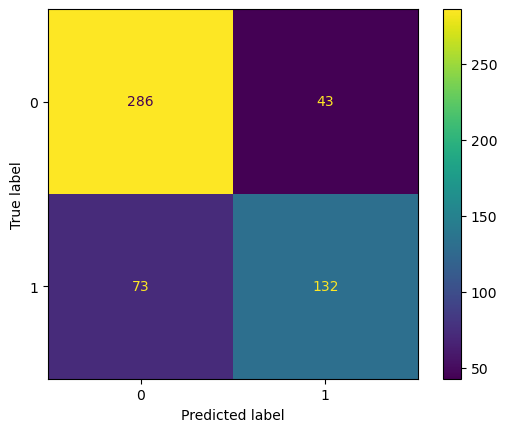

In [58]:
plot_confusion_matrix(knn, X_train10, y_train10)
plt.show()

## 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [59]:
conf=confusion_matrix(y_train10, y_pred10)

In [60]:
TN, FP, FN, TP = conf.ravel()

In [61]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN

In [62]:
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.7827715355805244

True Positive Rate/Sensitivity/Recall/Power: 0.6439024390243903
False Positive Rate/False Alarm Ratio/Fall-out: 0.13069908814589665
True Negative Rate/Specificity/Selectivity: 0.8693009118541033
False Negative Rate/Miss Rate: 0.35609756097560974

Precision/PPV: 0.7542857142857143
F1 Score: 0.6947368421052631

Support (0): 205
Support (1): 329


## 5. Run through steps 1-3 setting k to 20



In [64]:
df= acquire.get_titanic_data()

In [65]:
df = prepare.prep_titanic(df)

In [66]:
df=df.drop(columns=['Unnamed: 0','passenger_id','embark_town','sex'])

In [67]:
train, validate, test =prepare.split_data(df,'survived')

train -> (534, 9), 59.93%
validate -> (178, 9),19.98%
test -> (179, 9), 20.09%


In [68]:
X_train20 = train.iloc[:,1:]
y_train20 = train.survived

X_validate20 = validate.iloc[:,1:]
y_validate20 = validate.survived

X_test20 = test.iloc[:,1:]
y_test20 = test.survived

In [69]:
X_train20.head()

,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,3,0,0,7.8958,1,1,0,0
380,1,0,0,227.5250,1,0,0,0
492,1,0,0,30.5000,1,1,0,1
55,1,0,0,35.5000,1,1,0,1
243,3,0,0,7.1250,1,1,0,1


In [70]:
# weights = ['uniform', 'distance']
knn = KNeighborsClassifier(n_neighbors=20, weights='uniform')


In [71]:
knn.fit(X_train20, y_train20)


KNeighborsClassifier(n_neighbors=20)

In [72]:
KNeighborsClassifier()


KNeighborsClassifier()

In [73]:
y_pred20 = knn.predict(X_train20)
y_pred20[:5]

array([0, 1, 0, 0, 0])

In [74]:
y_pred_proba20 = knn.predict_proba(X_train20)
y_pred_proba20

array([[0.85, 0.15],
       [0.35, 0.65],
       [0.5 , 0.5 ],
       ...,
       [0.95, 0.05],
       [1.  , 0.  ],
       [0.45, 0.55]])

In [75]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train20, y_train20)))


Accuracy of KNN classifier on training set: 0.74


## 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [76]:
print(confusion_matrix(y_train20, y_pred20))

[[287  42]
 [ 95 110]]


In [77]:
pd.crosstab(y_train20, y_pred20)

col_0,0,1
survived,,
0,287,42
1,95,110


In [78]:
print(classification_report(y_train20, y_pred20))


              precision    recall  f1-score   support

           0       0.75      0.87      0.81       329
           1       0.72      0.54      0.62       205

    accuracy                           0.74       534
   macro avg       0.74      0.70      0.71       534
weighted avg       0.74      0.74      0.73       534



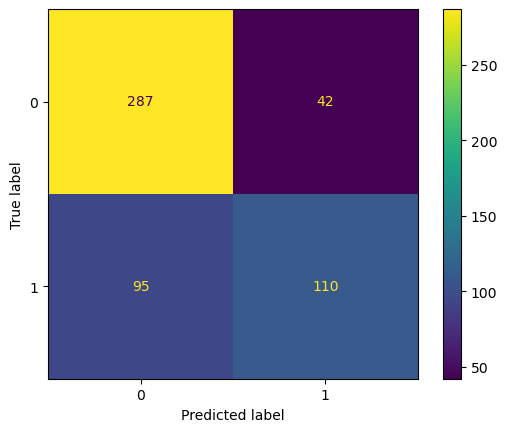

In [79]:
plot_confusion_matrix(knn, X_train20, y_train20)
plt.show()

## 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [80]:
conf=confusion_matrix(y_train20, y_pred20)

In [81]:
TN, FP, FN, TP = conf.ravel()

In [82]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN

In [83]:
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.7434456928838952

True Positive Rate/Sensitivity/Recall/Power: 0.5365853658536586
False Positive Rate/False Alarm Ratio/Fall-out: 0.1276595744680851
True Negative Rate/Specificity/Selectivity: 0.8723404255319149
False Negative Rate/Miss Rate: 0.4634146341463415

Precision/PPV: 0.7236842105263158
F1 Score: 0.6162464985994398

Support (0): 205
Support (1): 329


## 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [ ]:
## the evaluation metrics all get weaker as 'n' for KNN increases do to the general distance of its neighbors incresing 
##   as the model reaches further to find its neighbors.

In [84]:
## In this model the bes performance is when 'n' is 5. Siince the neighbors are nearer than in the 
##    other models they are the most similar. This makes its predictions more acurrate

## 7. Which model performs best on our out-of-sample data from validate?

In [175]:
#### n=5

In [85]:
df= acquire.get_titanic_data()

In [86]:
df = prepare.prep_titanic(df)

In [87]:
df=df.drop(columns=['Unnamed: 0','passenger_id','embark_town','sex'])

In [88]:
train, validate, test =prepare.split_data(df,'survived')

train -> (534, 9), 59.93%
validate -> (178, 9),19.98%
test -> (179, 9), 20.09%


In [89]:
X_train = train.iloc[:,1:]
y_train = train.survived

X_validate = validate.iloc[:,1:]
y_validate = validate.survived

X_test = test.iloc[:,1:]
y_test = test.survived

In [90]:
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,3,0,0,7.8958,1,1,0,0
380,1,0,0,227.5250,1,0,0,0
492,1,0,0,30.5000,1,1,0,1
55,1,0,0,35.5000,1,1,0,1
243,3,0,0,7.1250,1,1,0,1


In [91]:
# weights = ['uniform', 'distance']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')


In [92]:
knn.fit(X_validate, y_validate)


KNeighborsClassifier()

In [93]:
KNeighborsClassifier()


KNeighborsClassifier()

In [94]:
y_pred = knn.predict(X_validate)
y_pred[:5]

array([0, 0, 0, 0, 0])

In [95]:
y_pred_proba = knn.predict_proba(X_validate)
y_pred_proba

array([[0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ],
       [0.6,

In [96]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))


Accuracy of KNN classifier on training set: 0.78


## 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [97]:
print(confusion_matrix(y_validate, y_pred))

[[89 21]
 [19 49]]


In [98]:
pd.crosstab(y_validate, y_pred)

col_0,0,1
survived,,
0,89,21
1,19,49


In [99]:
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.81      0.82       110
           1       0.70      0.72      0.71        68

    accuracy                           0.78       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.78      0.78      0.78       178



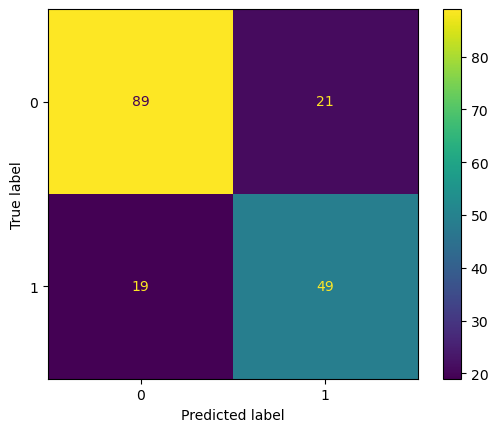

In [100]:
plot_confusion_matrix(knn, X_validate, y_validate)
plt.show()

## 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [101]:
conf=confusion_matrix(y_validate, y_pred)

In [102]:
TN, FP, FN, TP = conf.ravel()

In [103]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN

In [104]:
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.7752808988764045

True Positive Rate/Sensitivity/Recall/Power: 0.7205882352941176
False Positive Rate/False Alarm Ratio/Fall-out: 0.19090909090909092
True Negative Rate/Specificity/Selectivity: 0.8090909090909091
False Negative Rate/Miss Rate: 0.27941176470588236

Precision/PPV: 0.7
F1 Score: 0.7101449275362319

Support (0): 68
Support (1): 110


## 4. Run through steps 1-3 setting k to 10



In [153]:
df= acquire.get_titanic_data()

In [154]:
df = prepare.prep_titanic(df)

In [155]:
df=df.drop(columns=['Unnamed: 0','passenger_id','embark_town','sex'])

In [156]:
train, validate, test =prepare.split_data(df,'survived')

train -> (534, 9), 59.93%
validate -> (178, 9),19.98%
test -> (179, 9), 20.09%


In [157]:
X_train10 = train.iloc[:,1:]
y_train10 = train.survived

X_validate10 = validate.iloc[:,1:]
y_validate10 = validate.survived

X_test10 = test.iloc[:,1:]
y_test10 = test.survived

In [158]:
X_train10.head()

,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,3,0,0,7.8958,1,1,0,0
380,1,0,0,227.5250,1,0,0,0
492,1,0,0,30.5000,1,1,0,1
55,1,0,0,35.5000,1,1,0,1
243,3,0,0,7.1250,1,1,0,1


In [159]:
# weights = ['uniform', 'distance']
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')


In [160]:
knn.fit(X_validate10, y_validate10)


KNeighborsClassifier(n_neighbors=10)

In [161]:
KNeighborsClassifier()


KNeighborsClassifier()

In [162]:
y_pred10 = knn.predict(X_validate10)
y_pred10[:5]

array([0, 0, 0, 0, 0])

In [163]:
y_pred_proba10 = knn.predict_proba(X_validate10)
y_pred_proba10

array([[0.6, 0.4],
       [0.8, 0.2],
       [0.7, 0.3],
       [0.7, 0.3],
       [0.8, 0.2],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.7, 0.3],
       [0.5, 0.5],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.9, 0.1],
       [1. , 0. ],
       [0.5, 0.5],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.7, 0.3],
       [0.7, 0.3],
       [0.8, 0.2],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [0.7, 0.3],
       [0.9, 0.1],
       [0.7, 0.3],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.1, 0.9],
       [0.6, 0.4],
       [0.7, 0.3],
       [0.5, 0.5],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.7, 0.3],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.5, 0.5],
       [0.7, 0.3],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.4, 0.6],
       [0.7, 0.3],
       [0.5, 0.5],
       [0.7, 0.3],
       [0.6,

In [164]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_validate10, y_validate10)))


Accuracy of KNN classifier on training set: 0.72


## 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [165]:
print(confusion_matrix(y_validate10, y_validate10))

[[110   0]
 [  0  68]]


In [166]:
pd.crosstab(y_validate10, y_validate10)

survived,0,1
survived,,
0,110,0
1,0,68


In [168]:
print(classification_report(y_validate10, y_pred10))


              precision    recall  f1-score   support

           0       0.72      0.92      0.80       110
           1       0.76      0.41      0.53        68

    accuracy                           0.72       178
   macro avg       0.74      0.66      0.67       178
weighted avg       0.73      0.72      0.70       178



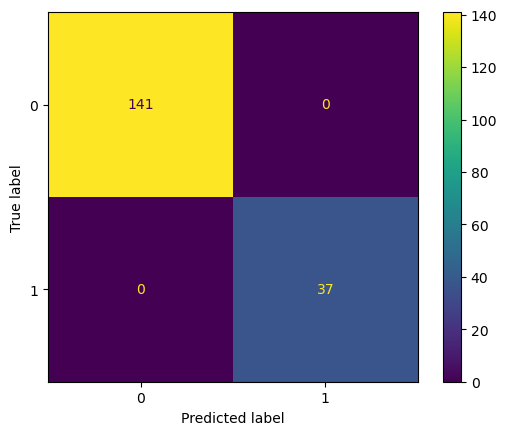

In [169]:
plot_confusion_matrix(knn, X_validate10, y_pred10)
plt.show()

## 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [170]:
conf=confusion_matrix(y_validate10, y_pred10)

In [171]:
TN, FP, FN, TP = conf.ravel()

In [172]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN

In [173]:
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.7247191011235955

True Positive Rate/Sensitivity/Recall/Power: 0.4117647058823529
False Positive Rate/False Alarm Ratio/Fall-out: 0.08181818181818182
True Negative Rate/Specificity/Selectivity: 0.9181818181818182
False Negative Rate/Miss Rate: 0.5882352941176471

Precision/PPV: 0.7567567567567568
F1 Score: 0.5333333333333332

Support (0): 68
Support (1): 110


## 5. Run through steps 1-3 setting k to 20



In [125]:
df= acquire.get_titanic_data()

In [126]:
df = prepare.prep_titanic(df)

In [127]:
df=df.drop(columns=['Unnamed: 0','passenger_id','embark_town','sex'])

In [128]:
train, validate, test =prepare.split_data(df,'survived')

train -> (534, 9), 59.93%
validate -> (178, 9),19.98%
test -> (179, 9), 20.09%


In [129]:
X_train20 = train.iloc[:,1:]
y_train20 = train.survived

X_validate20 = validate.iloc[:,1:]
y_validate20 = validate.survived

X_test20 = test.iloc[:,1:]
y_test20 = test.survived

In [130]:
X_train20.head()

,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,3,0,0,7.8958,1,1,0,0
380,1,0,0,227.5250,1,0,0,0
492,1,0,0,30.5000,1,1,0,1
55,1,0,0,35.5000,1,1,0,1
243,3,0,0,7.1250,1,1,0,1


In [131]:
# weights = ['uniform', 'distance']
knn = KNeighborsClassifier(n_neighbors=20, weights='uniform')


In [140]:
knn.fit(X_validate20, y_validate20)


KNeighborsClassifier(n_neighbors=20)

In [141]:
KNeighborsClassifier()


KNeighborsClassifier()

In [142]:
y_pred20 = knn.predict(X_validate20)
y_pred20[:5]

array([0, 0, 0, 0, 0])

In [143]:
y_pred_proba20 = knn.predict_proba(X_validate20)
y_pred_proba20

array([[0.6 , 0.4 ],
       [0.8 , 0.2 ],
       [0.5 , 0.5 ],
       [0.75, 0.25],
       [0.55, 0.45],
       [0.5 , 0.5 ],
       [0.65, 0.35],
       [0.6 , 0.4 ],
       [0.65, 0.35],
       [0.55, 0.45],
       [0.5 , 0.5 ],
       [0.55, 0.45],
       [0.95, 0.05],
       [0.9 , 0.1 ],
       [0.55, 0.45],
       [0.65, 0.35],
       [0.8 , 0.2 ],
       [0.5 , 0.5 ],
       [0.7 , 0.3 ],
       [0.8 , 0.2 ],
       [0.9 , 0.1 ],
       [0.9 , 0.1 ],
       [0.8 , 0.2 ],
       [0.8 , 0.2 ],
       [0.55, 0.45],
       [0.95, 0.05],
       [0.55, 0.45],
       [0.85, 0.15],
       [0.6 , 0.4 ],
       [0.65, 0.35],
       [0.55, 0.45],
       [0.3 , 0.7 ],
       [0.25, 0.75],
       [0.65, 0.35],
       [0.7 , 0.3 ],
       [0.55, 0.45],
       [0.3 , 0.7 ],
       [0.8 , 0.2 ],
       [0.7 , 0.3 ],
       [0.9 , 0.1 ],
       [0.8 , 0.2 ],
       [0.55, 0.45],
       [0.55, 0.45],
       [0.55, 0.45],
       [0.65, 0.35],
       [0.8 , 0.2 ],
       [0.9 , 0.1 ],
       [0.85,

In [144]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_validate20, y_validate20)))


Accuracy of KNN classifier on training set: 0.68


## 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [145]:
print(confusion_matrix(y_validate20, y_validate20))

[[110   0]
 [  0  68]]


In [146]:
pd.crosstab(y_validate20, y_validate20)

survived,0,1
survived,,
0,110,0
1,0,68


In [147]:
print(classification_report(y_validate20, y_pred20))


              precision    recall  f1-score   support

           0       0.67      0.95      0.78       110
           1       0.74      0.25      0.37        68

    accuracy                           0.68       178
   macro avg       0.71      0.60      0.58       178
weighted avg       0.70      0.68      0.63       178



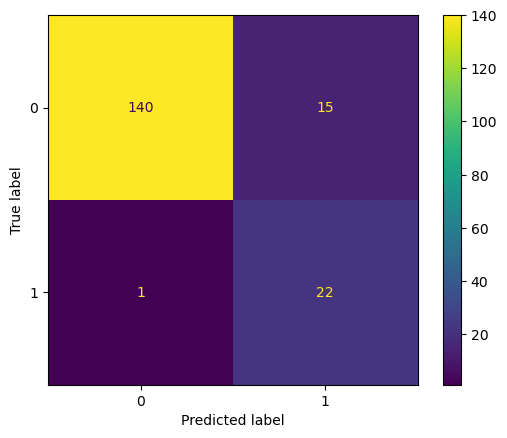

In [174]:
plot_confusion_matrix(knn, X_validate20, y_pred20)
plt.show()

## 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [149]:
conf=confusion_matrix(y_validate20, y_pred20)

In [150]:
TN, FP, FN, TP = conf.ravel()

In [151]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN

In [152]:
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.6797752808988764

True Positive Rate/Sensitivity/Recall/Power: 0.25
False Positive Rate/False Alarm Ratio/Fall-out: 0.05454545454545454
True Negative Rate/Specificity/Selectivity: 0.9454545454545454
False Negative Rate/Miss Rate: 0.75

Precision/PPV: 0.7391304347826086
F1 Score: 0.37362637362637363

Support (0): 68
Support (1): 110
